<a href="https://colab.research.google.com/github/LukmanAP/dataset1/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Membuat Variabel x dan y yang berisikan dari colom
*   x = colom USIA, colom IPK
*   y = colom STATUS KELULUSAN




In [ ]:
dataset = pd.read_csv("data_kelulusan_mahasiswa.csv")
x = dataset.iloc[:,[3,13]]
y = dataset.iloc[:,-1]

In [ ]:
x.head(10)

,UMUR,IPK
0,28,3.07
1,32,3.17
2,29,3.54
3,27,3.41
4,29,3.09
5,27,3.07
6,26,3.06
7,27,2.91
8,25,3.40
9,28,2.20


In [ ]:
y.head(10)

0    TERLAMBAT
1    TERLAMBAT
2    TERLAMBAT
3    TERLAMBAT
4    TERLAMBAT
5    TERLAMBAT
6        TEPAT
7        TEPAT
8    TERLAMBAT
9    TERLAMBAT
Name: STATUS KELULUSAN, dtype: object

Untuk data STATUS KELULLUSAN dikarenakan masih dalam bentuk kategorikal ita ubah menjadi bentuk NUMERIK


> 0 => TEPAT

> 1 => TERLAMBAT





In [ ]:
from sklearn.preprocessing import LabelEncoder
kelulusan = LabelEncoder()
y = kelulusan.fit_transform(y)

In [ ]:
print(y)

[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0]


Kita Pisahkan Data Training dan Data Testing

*   75% untuk Training
*   25% untuk Testing


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

jumlah baris 282

In [ ]:
print(x_train)

     UMUR  IPK 
287    24  2.99
334    23  3.53
124    25  3.28
22     26  3.11
216    26  3.51
..    ...   ...
323    24  3.52
192    25  2.59
117    24  3.57
47     28  3.24
172    25  1.93

[282 rows x 2 columns]


jumlah baris 94

In [ ]:
print(x_test)

     UMUR  IPK 
122    26  2.48
297    23  2.53
313    23  3.32
366    23  2.88
204    24  2.87
..    ...   ...
49     27  2.66
330    27  3.50
252    30  2.68
276    25  3.02
229    27  2.94

[94 rows x 2 columns]


In [ ]:
print(y_train)

[0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1]


In [ ]:
print(y_test)

[0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1
 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1]


Kita buat standar Scaler untuk x_train dan x_test

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-5.86606971e-01  1.50704749e-01]
 [-9.05341395e-01  1.27567137e+00]
 [-2.67872548e-01  7.54853491e-01]
 [ 5.08618761e-02  4.00697332e-01]
 [ 5.08618761e-02  1.23400594e+00]
 [ 1.32579957e+00  4.87574187e-03]
 [ 6.74428478e+00  2.13202894e-01]
 [-5.86606971e-01  4.84028193e-01]
 [-2.67872548e-01 -4.53443994e-01]
 [ 3.69596300e-01  1.42150038e+00]
 [-5.86606971e-01 -9.32596445e-01]
 [ 5.08618761e-02 -9.74261875e-01]
 [ 1.96326842e+00 -3.67896887e-02]
 [-9.05341395e-01  1.71537464e-01]
 [-1.22407582e+00  1.50704749e-01]
 [ 3.69596300e-01  1.29872033e-01]
 [-5.86606971e-01  4.42362762e-01]
 [ 1.00706515e+00  6.73738877e-02]
 [-9.05341395e-01 -8.28432869e-01]
 [ 3.69596300e-01  1.06734422e+00]
 [-2.67872548e-01  9.42347929e-01]
 [-5.86606971e-01 -5.36774855e-01]
 [ 5.08618761e-02  8.59017068e-01]
 [-2.67872548e-01 -5.76224039e-02]
 [-9.05341395e-01  1.33816952e+00]
 [ 3.69596300e-01  1.29872033e-01]
 [ 3.69596300e-01 -9.32596445e-01]
 [-2.67872548e-01  1.94231826e+00]
 [-2.67872548e-01 -4

In [ ]:
print(x_test)

[[ 5.08618761e-02 -9.11763730e-01]
 [-9.05341395e-01 -8.07600153e-01]
 [-9.05341395e-01  8.38184352e-01]
 [-9.05341395e-01 -7.84551192e-02]
 [-5.86606971e-01 -9.92878344e-02]
 [ 3.69596300e-01  1.40066766e+00]
 [-2.67872548e-01  1.06734422e+00]
 [-2.67872548e-01  9.00682498e-01]
 [ 1.32579957e+00 -1.22425446e+00]
 [ 5.08618761e-02 -1.59569734e-02]
 [-5.86606971e-01 -1.82618695e-01]
 [-5.86606971e-01  7.34020776e-01]
 [ 3.69596300e-01  7.34020776e-01]
 [-9.05341395e-01  6.29857200e-01]
 [-2.67872548e-01  4.42362762e-01]
 [-5.86606971e-01 -1.59569734e-02]
 [-2.67872548e-01  1.09039318e-01]
 [-5.86606971e-01 -4.32611279e-01]
 [ 1.96326842e+00 -2.12006121e+00]
 [-9.05341395e-01 -4.11778563e-01]
 [-5.86606971e-01  2.54868325e-01]
 [ 7.70048805e+00  5.04860908e-01]
 [-5.86606971e-01  4.87574187e-03]
 [ 5.08618761e-02  4.87574187e-03]
 [-5.86606971e-01  6.92355346e-01]
 [ 3.69596300e-01  1.04651150e+00]
 [-5.86606971e-01  4.84028193e-01]
 [ 1.32579957e+00 -2.24284126e-01]
 [ 5.08618761e-02  2

Memanggil Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Menghitung Prediksi

In [ ]:
y_pred = classifier.predict(x_test)

Menghitung Nilai Efaluasi

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[43  9]
 [31 11]]


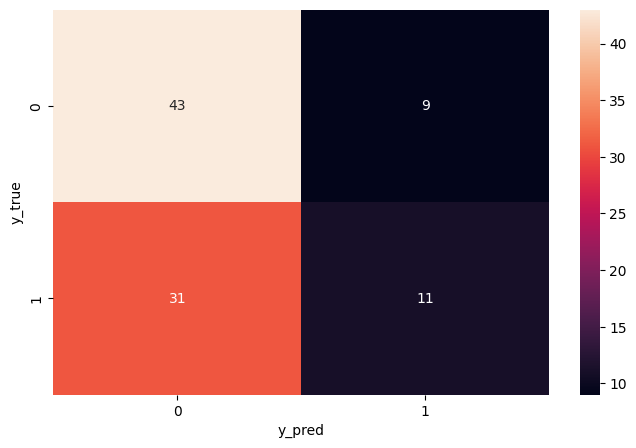

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.83      0.68        52
           1       0.55      0.26      0.35        42

    accuracy                           0.57        94
   macro avg       0.57      0.54      0.52        94
weighted avg       0.57      0.57      0.54        94



Membuat Persebaran Data untuk data Training

<ipython-input-70-e672b551f9b0>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


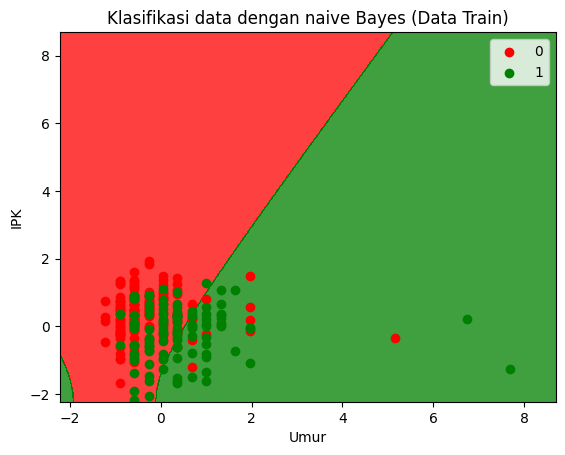

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi data dengan naive Bayes (Data Train)')
plt.xlabel('Umur')
plt.ylabel('IPK')
plt.legend()
plt.show()

Membuat Persebaran Data untuk data Testing

<ipython-input-52-332ed38173ce>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


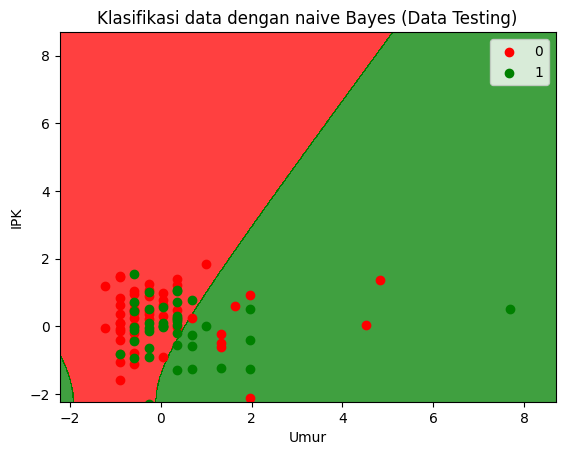

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi data dengan naive Bayes (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('IPK')
plt.legend()
plt.show()